### CRM Case Study: Using the Elbow Method for Customer Complaint Analysis

### Case Study:- For e.g. an E-Commerce Company
##### Background:
- ShopEase, a leading e-commerce retailer, receives thousands of customer complaints daily through:

  
-  Emails
-  Live Chat
-  Social Media
-  Customer Support Calls
The CRM team struggles to manually categorize complaints, leading to delays in resolutions and customer dissatisfaction.
  

### Solution: Using the Elbow Method & K-Means Clustering
#### Collect Customer Complaints

- Customer ID
- Feedback (text complaints)
- Purchase History
- Issue Type (if available)


### Python implementation

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [5]:
# Read CSV and force pandas to split properly
df = pd.read_csv("customer_feedback.csv", sep=",", encoding="utf-8")

# Split first row into actual column names
if len(df.columns) == 1:
    df = df[df.columns[0]].str.split(",", expand=True)
    df.columns = ['customer_id', 'feedback', 'complaint_type', 'purchase_history']

print("Fixed Columns:", df.columns.tolist())

# Verify output
print(df.head())  

Fixed Columns: ['customer_id', 'feedback', 'complaint_type', 'purchase_history']
  customer_id                                           feedback  \
0         101          The product stopped working within a week   
1         102  The delivery was late by 3 days no update was ...   
2         103            Customer support was unhelpful and rude   
3         104           The app crashes frequently please fix it   
4         105                 Received a wrong item unacceptable   

     complaint_type purchase_history  
0    Product Defect                5  
1     Late Delivery                2  
2  Customer Service                3  
3   Technical Issue                4  
4     Wrong Product                2  


### # Convert feedback into numerical vectors using TF-IDF

In [7]:
# Convert feedback into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['feedback'])


### Apply the Elbow Method to Find Optimal Clusters
- Run K-Means for multiple values of k.
- Calculate inertia (WCSS - Within-Cluster Sum of Squares).
- Plot Elbow Curve to find the best k.

In [8]:
inertia = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)



### Plot Elbow Curve

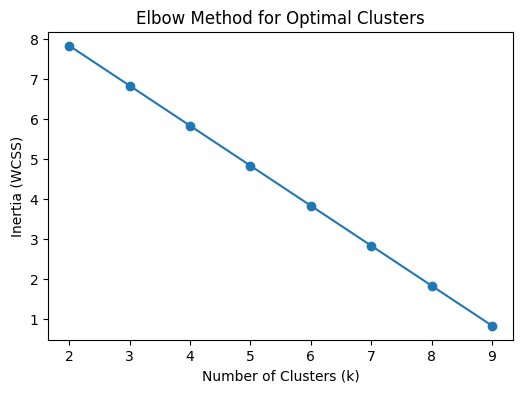

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

### Apply K-Means Clustering to Group Complaints

In [10]:
# Train final K-Means model with optimal clusters (k=3)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# Display the clustered feedback
print(df[['feedback', 'cluster']])


                                            feedback  cluster
0          The product stopped working within a week        0
1  The delivery was late by 3 days no update was ...        0
2            Customer support was unhelpful and rude        1
3           The app crashes frequently please fix it        0
4                 Received a wrong item unacceptable        2
5  The website is too slow and difficult to navigate        0
6     I was charged twice for my order need a refund        0
7       The quality is not as advertised looks cheap        0
8             Support team takes too long to respond        1
9  The payment process is confusing and not user ...        0


### Analyze Cluster Results
##### Cluster 0: Delivery & Shipping Issues
- "The delivery was delayed by 4 days!"
- "No update on my order status!"

  
### Cluster 1: Product Quality Complaints 
- "The product stopped working within a week!"
- "Received a defective product!"


### Cluster 2: Customer Support & Billing Issues 
- "Customer service was rude and unhelpful."
- "I was charged twice for the same order."
